In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
# Directory structure
base_dir = r"D:\Om Saran\ML\adobe\dataset\closed"
categories = ['circle', 'rectangle', 'irregular', 'star','rounded_rec', 'ellipse']  # Add all folder names

In [3]:
# Data storage
data = []
labels = []

# Load data
for category in categories:
    folder_path = os.path.join(base_dir, category)
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if file_path.endswith('.csv'):
            # Read CSV file
            points = pd.read_csv(file_path)
            data.append(points.values)  # Store points as numpy array or DataFrame
            labels.append(category)  # Store the label

In [4]:
data[0]

array([[530.83688354, 386.50518799],
       [529.09716797, 386.38467407],
       [527.35690308, 386.27212524],
       [525.6159668 , 386.17050171],
       [523.87417603, 386.08456421],
       [522.13162231, 386.01647949],
       [520.3883667 , 385.9692688 ],
       [518.6446228 , 385.94714355],
       [516.90078735, 385.95223999],
       [515.1572876 , 385.98840332],
       [513.41485596, 386.05947876],
       [511.67443848, 386.16903687],
       [509.93722534, 386.32113647],
       [508.20471191, 386.51953125],
       [506.47875977, 386.76849365],
       [504.76168823, 387.07275391],
       [503.0562439 , 387.43643188],
       [501.3656311 , 387.86376953],
       [499.69393921, 388.3598938 ],
       [498.04534912, 388.92810059],
       [496.42507935, 389.57247925],
       [494.83862305, 390.29611206],
       [493.29171753, 391.10079956],
       [491.79095459, 391.98852539],
       [490.34179688, 392.95822144],
       [488.89157104, 393.92611694],
       [487.38150024, 394.79785156],
 

In [5]:
unique_labels = list(set(labels))

print(unique_labels)

['irregular', 'circle', 'rectangle', 'ellipse', 'star', 'rounded_rec']


In [6]:
import matplotlib.pyplot as plt

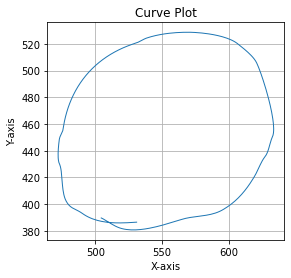

In [7]:
x_coords, y_coords = zip(*data[0])

# Plot the curve
plt.plot(x_coords, y_coords, linewidth = 1)  # Use marker='o' to show points
plt.title('Curve Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.gca().set_aspect('equal')
plt.grid(True)  # Optional: Add grid for better visualization
plt.show()

In [9]:
def distances_to_centroid(points):
    # Convert to numpy array for easier calculations
    points = np.array(points)
    
    # Calculate centroid
    centroid = points.mean(axis=0)
    
    # Compute distances to centroid
    distances = np.sqrt(((points - centroid) ** 2).sum(axis=1))
    
    return distances

In [10]:
def calculate_curvature(points):
    points = np.array(points)
    num_points = len(points)
    
    # Calculate angles between segments
    curvatures = []
    for i in range(1, num_points - 1):
        p1 = points[i - 1]
        p2 = points[i]
        p3 = points[i + 1]
        
        # Vectors
        v1 = p2 - p1
        v2 = p3 - p2
        
        # Angle between vectors
        dot_product = np.dot(v1, v2)
        norm_v1 = np.linalg.norm(v1)
        norm_v2 = np.linalg.norm(v2)
         # Prevent division by zero
        if norm_v1 == 0 or norm_v2 == 0:
            curvatures.append(0.0)
            continue
        
        cos_angle = dot_product / (norm_v1 * norm_v2)
        
        # Clamp the cosine value to avoid invalid inputs for arccos
        cos_angle = np.clip(cos_angle, -1.0, 1.0)
        
        angle = np.arccos(cos_angle)
        curvatures.append(angle)
    
    curvatures = np.array(curvatures)
    padded_curvatures = np.concatenate(([0], curvatures, [0]))
    
    return padded_curvatures

In [11]:
max_len = 1000
def extract_features(points):
    # Calculate curvature vector
    curvatures = calculate_curvature(points)
    
    # Calculate distance vector to centroid
    distances = distances_to_centroid(points)
    
    # Combine features into a single matrix
    # Ensure the feature vectors are of the same length
    if len(curvatures) != len(distances):
        min_len = min(len(curvatures), len(distances))
        curvatures = curvatures[:min_len]
        distances = distances[:min_len]
    
    features = np.array([[d, c] for d, c in zip(distances, curvatures)])
    
    if len(features) < max_len:
        # Pad with [-1, -1]
        padding_length = max_len - len(features)
        features_padded = np.vstack([features, np.full((padding_length, 2), -1)])
    else:
        # Truncate
        features_padded = features[:max_len]
    
    return features_padded

In [12]:
labels[0]

'circle'

In [13]:
X = []
Y = []

for curve, label in zip(data, labels):
    features = extract_features(curve)
    if features.size > 0:  # Ensure that features are not empty
        X.append(features)
        Y.append(label)
# Convert lists to numpy arrays


In [15]:
X = np.array(X)
Y = np.array(Y)

In [16]:
X[0]

array([[ 6.65879147e+01,  0.00000000e+00],
       [ 6.72252079e+01,  4.57826272e-03],
       [ 6.78939951e+01,  6.27668995e-03],
       ...,
       [-1.00000000e+00, -1.00000000e+00],
       [-1.00000000e+00, -1.00000000e+00],
       [-1.00000000e+00, -1.00000000e+00]])

In [17]:
X.shape

(88, 1000, 2)

In [18]:
X = X.reshape(X.shape[0], -1)

In [19]:
X.shape

(88, 2000)

In [20]:
Y[0]

'circle'

In [21]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# test_size: proportion of the dataset to include in the test split (20% here)
# random_state: seed used by the random number generator for reproducibility

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, Y)

RandomForestClassifier(random_state=42)

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
Y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Print classification report
print('Classification Report:')
print(classification_report(Y_test, Y_pred))

# Print confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(Y_test, Y_pred))

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

      circle       1.00      1.00      1.00         8
     ellipse       1.00      1.00      1.00         4
   irregular       1.00      1.00      1.00         3
   rectangle       1.00      1.00      1.00         5
 rounded_rec       1.00      1.00      1.00         3
        star       1.00      1.00      1.00         4

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27

Confusion Matrix:
[[8 0 0 0 0 0]
 [0 4 0 0 0 0]
 [0 0 3 0 0 0]
 [0 0 0 5 0 0]
 [0 0 0 0 3 0]
 [0 0 0 0 0 4]]


In [43]:
from joblib import dump, load
dump(model, 'model1.joblib')

['model1.joblib']

In [26]:
c1 = pd.read_csv(r"D:\Om Saran\ML\adobe\dataset\closed\rectangle\r8.csv")

In [27]:
c1

,x,y
0,495.505798,423.644806
1,493.332916,423.708527
2,491.159821,423.764099
3,488.986511,423.811798
4,486.813049,423.850952
...,...,...
395,506.168274,425.642273
396,504.011444,425.370972
397,501.859436,425.064148
398,499.715363,424.706543


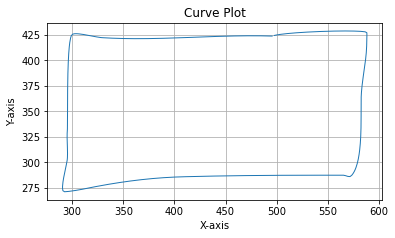

In [28]:
x_coords = c1['x']
y_coords = c1['y']

# Plot the curve
plt.plot(x_coords, y_coords, linewidth = 1)  # Use marker='o' to show points
plt.title('Curve Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.gca().set_aspect('equal')
plt.grid(True)  # Optional: Add grid for better visualization
plt.show()

In [29]:
fv = extract_features(c1)

In [134]:
fv.shape

(1000, 2)

In [135]:
fv = fv.reshape(1, -1)
fv.shape

(1, 2000)

In [136]:
model.predict(fv)

array(['rectangle'], dtype='<U11')

In [137]:
dist = distances_to_centroid(c1)
type(dist)

numpy.ndarray

In [60]:
import numpy as np

def find_corners(points, angle_threshold=0.5, distance=5):
    def safe_arccos(x):
        return np.arccos(np.clip(x, -1.0, 1.0))
    
    def calculate_curvature(p1, p2, p3):
        v1 = np.array(p2) - np.array(p1)
        v2 = np.array(p3) - np.array(p2)
        dot_product = np.dot(v1, v2)
        norm_v1 = np.linalg.norm(v1)
        norm_v2 = np.linalg.norm(v2)
        if norm_v1 == 0 or norm_v2 == 0:
            return 0
        angle = safe_arccos(dot_product / (norm_v1 * norm_v2))
        return angle
    
    if not isinstance(points, np.ndarray):
        # Convert to NumPy array if it's not already
        points = points.to_numpy()
    
    num_points = len(points)
    corners = []
    marked_indices = set()
    
    i = 0
    loop_count = 0  # Counter to prevent infinite loop
    
    while loop_count < num_points:
        if i in marked_indices:
            i = (i + 1) % num_points
            loop_count += 1
            continue
        
        # Determine indices for curvature calculation with cyclic behavior
        p1 = points[i]
        p2 = points[(i + distance // 2) % num_points]
        p3 = points[(i + distance) % num_points]
        
        curvature = calculate_curvature(p1, p2, p3)
        if curvature > angle_threshold:
            corners.append(p2)
            # Mark neighbors to skip, handle cyclic behavior
            for j in range(-distance, distance + 1):
                marked_index = (i + j) % num_points
                marked_indices.add(marked_index)
            i = (i + distance) % num_points  # Move ahead to next to next point
        else:
            i = (i + 1) % num_points
        
        loop_count += 1
    
    return np.array(corners)


In [61]:

# Find corners
corners = find_corners(c1)
print("Detected corners:", corners)

Detected corners: [[302.41921997 425.94772339]
 [290.50244141 274.53343201]
 [569.50390625 286.41070557]
 [588.18865967 424.72570801]]


In [34]:
def calculate_dimensions(corners):
    def calculate_distance(p1, p2):
        return np.linalg.norm(np.array(p2) - np.array(p1))
    
    distances = []
    for j in range(len(corners) - 1):
        dist = calculate_distance(corners[j], corners[j + 1])
        distances.append(dist)

    # Alternate labeling as height and breadth
    heights = distances[::2]
    breadths = distances[1::2]

    avg_height = np.mean(heights) if heights else 0
    avg_breadth = np.mean(breadths) if breadths else 0

    return avg_height, avg_breadth

In [38]:
from sklearn.decomposition import PCA

def pca_bounding_box(corners):
    pca = PCA(n_components=2)
    pca.fit(corners)
    mean = pca.mean_
    components = pca.components_
    
    # Project points onto the principal components
    projections = np.dot(corners - mean, components.T)
    
    min_proj = np.min(projections, axis=0)
    max_proj = np.max(projections, axis=0)
    
    # Define rectangle corners
    rectangle = np.array([
        mean + min_proj[0] * components[0] + min_proj[1] * components[1],
        mean + min_proj[0] * components[0] + max_proj[1] * components[1],
        mean + max_proj[0] * components[0] + max_proj[1] * components[1],
        mean + max_proj[0] * components[0] + min_proj[1] * components[1]
    ])
    
    return rectangle

In [40]:
reg_corners = pca_bounding_box(corners)
reg_corners

array([[290.84908802, 268.98894401],
       [281.11913659, 424.61602212],
       [586.99986989, 443.73997352],
       [596.72982132, 288.11289541]])

In [138]:
radius = np.mean(dist)

In [139]:
center = c1.mean(axis =0)

In [ ]:
def generate_circle_points(center, radius, num_points=100):
    """
    Generate points on a circle in sequence at equal distances.
    
    Args:
    - center (tuple): The (x, y) coordinates of the circle's center.
    - radius (float): The radius of the circle.
    - num_points (int): The number of points to generate. Default is 100.
    
    Returns:
    - np.array: A numpy array of shape (num_points, 2) containing the (x, y) coordinates of the points.
    """
    h, k = center
    points = []

    # Increment angle by 2π/num_points for equal spacing
    delta_theta = 2 * np.pi / num_points

    for i in range(num_points):
        theta = i * delta_theta
        x = h + radius * np.cos(theta)
        y = k + radius * np.sin(theta)
        points.append((x, y))

    return np.array(points)